# Working Directory and package installation

In [1]:
from google.colab import drive
import os
import sys
import pandas as pd
import numpy as np
drive.mount('/content/drive/',force_remount=True)
os.chdir('/content/drive/MyDrive/BackUp_RL_CodeBase') # read files
# os.chdir('/content/drive/MyDrive/A_RL_CodeBase')
os.getcwd()

Mounted at /content/drive/


'/content/drive/MyDrive/BackUp_RL_CodeBase'

# Data Cleaning

Cleaning the closing price

In [2]:
df_raw = pd.read_csv("Input/A_priceRaw.csv")
df_raw

,date,open,high,low,close,adjcp,volume,tic,day
0,2000-12-29,23.206484,23.206484,23.206484,23.206484,-3.718896,0.0,ABI.BR,4
1,2000-12-29,15.987500,16.600000,15.987500,16.500000,12.005581,3295312.0,ADS.DE,4
2,2000-12-29,32.779652,32.987118,32.592930,32.966370,18.978546,559281.0,AI.PA,4
3,2000-12-29,398.000000,402.500000,395.100006,398.600006,185.079117,173105.0,ALV.DE,4
4,2000-12-29,36.365253,36.862007,35.342529,35.342529,28.022635,1861346.0,ASML.AS,4
...,...,...,...,...,...,...,...,...,...
254727,2022-03-31,15.232000,15.318000,14.800000,14.800000,13.706353,11919513.0,STLA.MI,3
254728,2022-03-31,153.440002,154.679993,151.619995,152.160004,148.702362,1464407.0,SU.PA,3
254729,2022-03-31,46.435001,46.810001,45.910000,46.029999,46.029999,6495026.0,TTE.PA,3
254730,2022-03-31,43.439999,43.549999,42.130001,42.310001,40.461723,2426645.0,VNA.DE,3


Cleaning closing price

In [4]:
## Take the prices column for all the tickers
df_desc = df_raw.pivot_table(index="date", columns="tic", values="close")

## Find tickers for which at least 97.5% data points available
nDates =int(df_desc.shape[0]*0.975)
series_x = df_desc.describe().transpose()['count'] > nDates
remaining_tickers = series_x.index[series_x]

# make a DataFrame which has closing prices of only the tickers for which data exists
filtered_prices_DF = df_desc[remaining_tickers]

# fill close price data and drop na(for datas which have no previous date to fill)
cleaned_closepricesDF = filtered_prices_DF.ffill().dropna().copy() 

# some checking
print(cleaned_closepricesDF.shape)
print(f'remaining tickers: {len(remaining_tickers)}')
# cleaned_closepricesDF.plot(subplots=True,layout=(10,5),figsize=(60,30)) # Check abnormaly

cleaned_closepricesDF.head()

(5456, 42)
remaining tickers: 42


tic,ABI.BR,ADS.DE,AI.PA,ALV.DE,ASML.AS,BAS.DE,BAYN.DE,BBVA.MC,BMW.DE,BN.PA,...,RMS.PA,SAF.PA,SAN.MC,SAN.PA,SAP.DE,SIE.DE,STLA.MI,SU.PA,TTE.PA,VOW.DE
date,,,,,,,,,,,,,,,,,,,,,
2001-02-05,18.880274,17.487499,29.771391,363.549988,39.740253,24.115000,52.255447,16.178928,38.150002,33.120705,...,52.066666,25.002001,10.109051,61.000000,38.500000,146.032791,7.392597,35.077698,40.375000,55.049999
2001-02-06,18.767742,17.982500,29.667658,367.989990,38.805187,23.900000,52.284969,16.102070,38.700001,34.205856,...,52.000000,25.375999,10.031156,61.849998,39.125000,146.275055,7.572567,34.707161,40.375000,55.900002
2001-02-07,18.849014,17.852501,30.082590,368.299988,37.913956,23.775000,52.097992,16.140499,38.900002,34.795612,...,50.000000,26.879999,10.221567,62.000000,37.277500,141.614014,7.644554,35.052998,39.400002,56.349998
2001-02-08,18.755239,18.290001,30.456030,375.500000,39.155838,23.750000,51.792923,16.226967,38.700001,34.677662,...,51.033333,26.459999,10.299462,63.200001,38.025002,143.416412,7.630711,36.214020,39.625000,57.750000
2001-02-09,18.661463,18.257500,30.767229,370.609985,37.797073,23.405001,51.655148,16.025209,38.520000,34.512531,...,49.666664,26.285999,10.195602,63.000000,35.812500,138.813522,7.564260,35.472942,39.724998,57.200001


In [5]:
# unpivot the table
cleaned_closepricesDF = cleaned_closepricesDF.reset_index().melt(id_vars='date',var_name='tic',value_name='close')
cleaned_closepricesDF.head()

,date,tic,close
0,2001-02-05,ABI.BR,18.880274
1,2001-02-06,ABI.BR,18.767742
2,2001-02-07,ABI.BR,18.849014
3,2001-02-08,ABI.BR,18.755239
4,2001-02-09,ABI.BR,18.661463


Cleaning open

In [6]:
#Cleaning the open price
## Take the prices column for all the tickers
df_desc = df_raw.pivot_table(index="date", columns="tic", values="open")

## Find tickers for which at least 97.5% data points available
nDates =int(df_desc.shape[0]*0.975)
series_x = df_desc.describe().transpose()['count'] > nDates
remaining_tickers = series_x.index[series_x]

# make a DataFrame which has closing prices of only the tickers for which data exists
filtered_prices_DF = df_desc[remaining_tickers]

# fill close price data and drop na(for datas which have no previous date to fill)
cleaned_openpricesDF = filtered_prices_DF.ffill().dropna().copy() 

# some checking
print(cleaned_openpricesDF.shape)
print(f'remaining tickers: {len(remaining_tickers)}')
# cleaned_closepricesDF.plot(subplots=True,layout=(10,5),figsize=(60,30)) # Check abnormaly

# unpivot the df
cleaned_openpricesDF = cleaned_openpricesDF.reset_index().melt(id_vars='date',var_name='tic',value_name='open')

(5456, 42)
remaining tickers: 42


Cleaning the high

In [7]:
#Cleaning the high price
## Take the prices column for all the tickers
df_desc = df_raw.pivot_table(index="date", columns="tic", values="high")

## Find tickers for which at least 97.5% data points available
nDates =int(df_desc.shape[0]*0.975)
series_x = df_desc.describe().transpose()['count'] > nDates
remaining_tickers = series_x.index[series_x]

# make a DataFrame which has closing prices of only the tickers for which data exists
filtered_prices_DF = df_desc[remaining_tickers]

# fill close price data and drop na(for datas which have no previous date to fill)
cleaned_highpricesDF = filtered_prices_DF.ffill().dropna().copy() 

# some checking
print(cleaned_highpricesDF.shape)
print(f'remianing tickers: {len(remaining_tickers)}')
# cleaned_highpricesDF.plot(subplots=True,layout=(10,5),figsize=(60,30)) # Check abnormaly

# unpivot the df
cleaned_highpricesDF = cleaned_highpricesDF.reset_index().melt(id_vars='date',var_name='tic',value_name='high')

(5456, 42)
remianing tickers: 42


Cleaning Low

In [8]:
#Cleaning the low price
## Take the prices column for all the tickers
df_desc = df_raw.pivot_table(index="date", columns="tic", values="low")

## Find tickers for which at least 97.5% data points available
nDates =int(df_desc.shape[0]*0.975)
series_x = df_desc.describe().transpose()['count'] > nDates
remaining_tickers = series_x.index[series_x]

# make a DataFrame which has closing prices of only the tickers for which data exists
filtered_prices_DF = df_desc[remaining_tickers]

# fill close price data and drop na(for datas which have no previous date to fill)
cleaned_lowpricesDF = filtered_prices_DF.ffill().dropna().copy() 

# some checking
print(cleaned_lowpricesDF.shape)
print(f'remianing tickers: {len(remaining_tickers)}')
# cleaned_closepricesDF.plot(subplots=True,layout=(10,5),figsize=(60,30)) # Check abnormaly

# unpivot the df
cleaned_lowpricesDF = cleaned_lowpricesDF.reset_index().melt(id_vars='date',var_name='tic',value_name='low')

(5456, 42)
remianing tickers: 42


adjcp

In [9]:
#Cleaning adjcp
## Take the prices column for all the tickers
df_desc = df_raw.pivot_table(index="date", columns="tic", values="adjcp")

## Find tickers for which at least 97.5% data points available
nDates =int(df_desc.shape[0]*0.975)
series_x = df_desc.describe().transpose()['count'] > nDates
remaining_tickers = series_x.index[series_x]

# make a DataFrame which has closing prices of only the tickers for which data exists
filtered_prices_DF = df_desc[remaining_tickers]

# fill close price data and drop na(for datas which have no previous date to fill)
cleaned_adjcpDF = filtered_prices_DF.ffill().dropna().copy() 

# some checking
print(cleaned_adjcpDF.shape)
print(f'remianing tickers: {len(remaining_tickers)}')
# cleaned_adjcpDF.plot(subplots=True,layout=(10,5),figsize=(60,30)) # Check abnormaly
# cleaned_adjcpDF.describe()

cleaned_adjcpDF = cleaned_adjcpDF.abs() 

# unpivot the df
cleaned_adjcpDF = cleaned_adjcpDF.reset_index().melt(id_vars='date',var_name='tic',value_name='adjcp')

(5456, 42)
remianing tickers: 42


volume

In [10]:
#Cleaning the volume
## Take the volume column for all the tickers
df_desc = df_raw.pivot_table(index="date", columns="tic", values="volume")

## Find tickers for which at least 97.5% data points available
nDates =int(df_desc.shape[0]*0.975)
series_x = df_desc.describe().transpose()['count'] > nDates
remaining_tickers = series_x.index[series_x]

# make a DataFrame which has closing prices of only the tickers for which data exists
filtered_prices_DF = df_desc[remaining_tickers]

# fill close price data and drop na(for datas which have no previous date to fill)
cleaned_volumeDF = filtered_prices_DF.ffill().dropna().copy() 

# some checking
print(cleaned_volumeDF.shape)
print(f'remianing tickers: {len(remaining_tickers)}')
# cleaned_volumeDF.plot(subplots=True,layout=(10,5),figsize=(60,30)) # Check abnormaly
# cleaned_volumeDF.describe()

# unpivot the df
cleaned_volumeDF = cleaned_volumeDF.reset_index().melt(id_vars='date',var_name='tic',value_name='volume')

(5456, 42)
remianing tickers: 42


merging all cleaned columns

In [11]:
df_raw

,date,open,high,low,close,adjcp,volume,tic,day
0,2000-12-29,23.206484,23.206484,23.206484,23.206484,-3.718896,0.0,ABI.BR,4
1,2000-12-29,15.987500,16.600000,15.987500,16.500000,12.005581,3295312.0,ADS.DE,4
2,2000-12-29,32.779652,32.987118,32.592930,32.966370,18.978546,559281.0,AI.PA,4
3,2000-12-29,398.000000,402.500000,395.100006,398.600006,185.079117,173105.0,ALV.DE,4
4,2000-12-29,36.365253,36.862007,35.342529,35.342529,28.022635,1861346.0,ASML.AS,4
...,...,...,...,...,...,...,...,...,...
254727,2022-03-31,15.232000,15.318000,14.800000,14.800000,13.706353,11919513.0,STLA.MI,3
254728,2022-03-31,153.440002,154.679993,151.619995,152.160004,148.702362,1464407.0,SU.PA,3
254729,2022-03-31,46.435001,46.810001,45.910000,46.029999,46.029999,6495026.0,TTE.PA,3
254730,2022-03-31,43.439999,43.549999,42.130001,42.310001,40.461723,2426645.0,VNA.DE,3


In [12]:
df_clean = pd.merge(cleaned_closepricesDF,cleaned_openpricesDF, on=['date','tic'])
df_clean = pd.merge(df_clean,cleaned_highpricesDF, on=['date','tic'])
df_clean = pd.merge(df_clean,cleaned_lowpricesDF, on=['date','tic'])
df_clean = pd.merge(df_clean,cleaned_adjcpDF, on=['date','tic'])
df_clean = pd.merge(df_clean,cleaned_volumeDF, on=['date','tic'])
df_clean

,date,tic,close,open,high,low,adjcp,volume
0,2001-02-05,ABI.BR,18.880274,18.755239,18.880274,18.730232,3.025609,781132.0
1,2001-02-06,ABI.BR,18.767742,18.799002,18.886526,18.598946,3.007577,1738341.0
2,2001-02-07,ABI.BR,18.849014,18.880274,18.880274,18.723982,3.020599,613206.0
3,2001-02-08,ABI.BR,18.755239,18.849014,18.849014,18.742737,3.005573,1151417.0
4,2001-02-09,ABI.BR,18.661463,18.755239,18.755239,18.605198,2.990545,659007.0
...,...,...,...,...,...,...,...,...
229147,2022-03-25,VOW.DE,218.000000,224.000000,224.000000,217.800003,209.731979,29739.0
229148,2022-03-28,VOW.DE,221.800003,220.199997,224.800003,220.000000,213.387863,35109.0
229149,2022-03-29,VOW.DE,238.399994,226.000000,240.000000,222.600006,229.358276,69686.0
229150,2022-03-30,VOW.DE,234.000000,238.000000,238.399994,231.199997,225.125153,40572.0


In [13]:
df_clean.to_csv('Input/B_priceClean.csv',index=False)

Checking

In [14]:
df_clean = pd.read_csv('Input/B_priceClean.csv')
df_clean

,date,tic,close,open,high,low,adjcp,volume
0,2001-02-05,ABI.BR,18.880274,18.755239,18.880274,18.730232,3.025609,781132.0
1,2001-02-06,ABI.BR,18.767742,18.799002,18.886526,18.598946,3.007577,1738341.0
2,2001-02-07,ABI.BR,18.849014,18.880274,18.880274,18.723982,3.020599,613206.0
3,2001-02-08,ABI.BR,18.755239,18.849014,18.849014,18.742737,3.005573,1151417.0
4,2001-02-09,ABI.BR,18.661463,18.755239,18.755239,18.605198,2.990545,659007.0
...,...,...,...,...,...,...,...,...
229147,2022-03-25,VOW.DE,218.000000,224.000000,224.000000,217.800003,209.731979,29739.0
229148,2022-03-28,VOW.DE,221.800003,220.199997,224.800003,220.000000,213.387863,35109.0
229149,2022-03-29,VOW.DE,238.399994,226.000000,240.000000,222.600006,229.358276,69686.0
229150,2022-03-30,VOW.DE,234.000000,238.000000,238.399994,231.199997,225.125153,40572.0


checking plot


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:225: UserWarning: When passing multiple axes, layout keyword is ignored
  "When passing multiple axes, layout keyword is ignored", UserWarning


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e14d07dd0>,
      dtype=object)

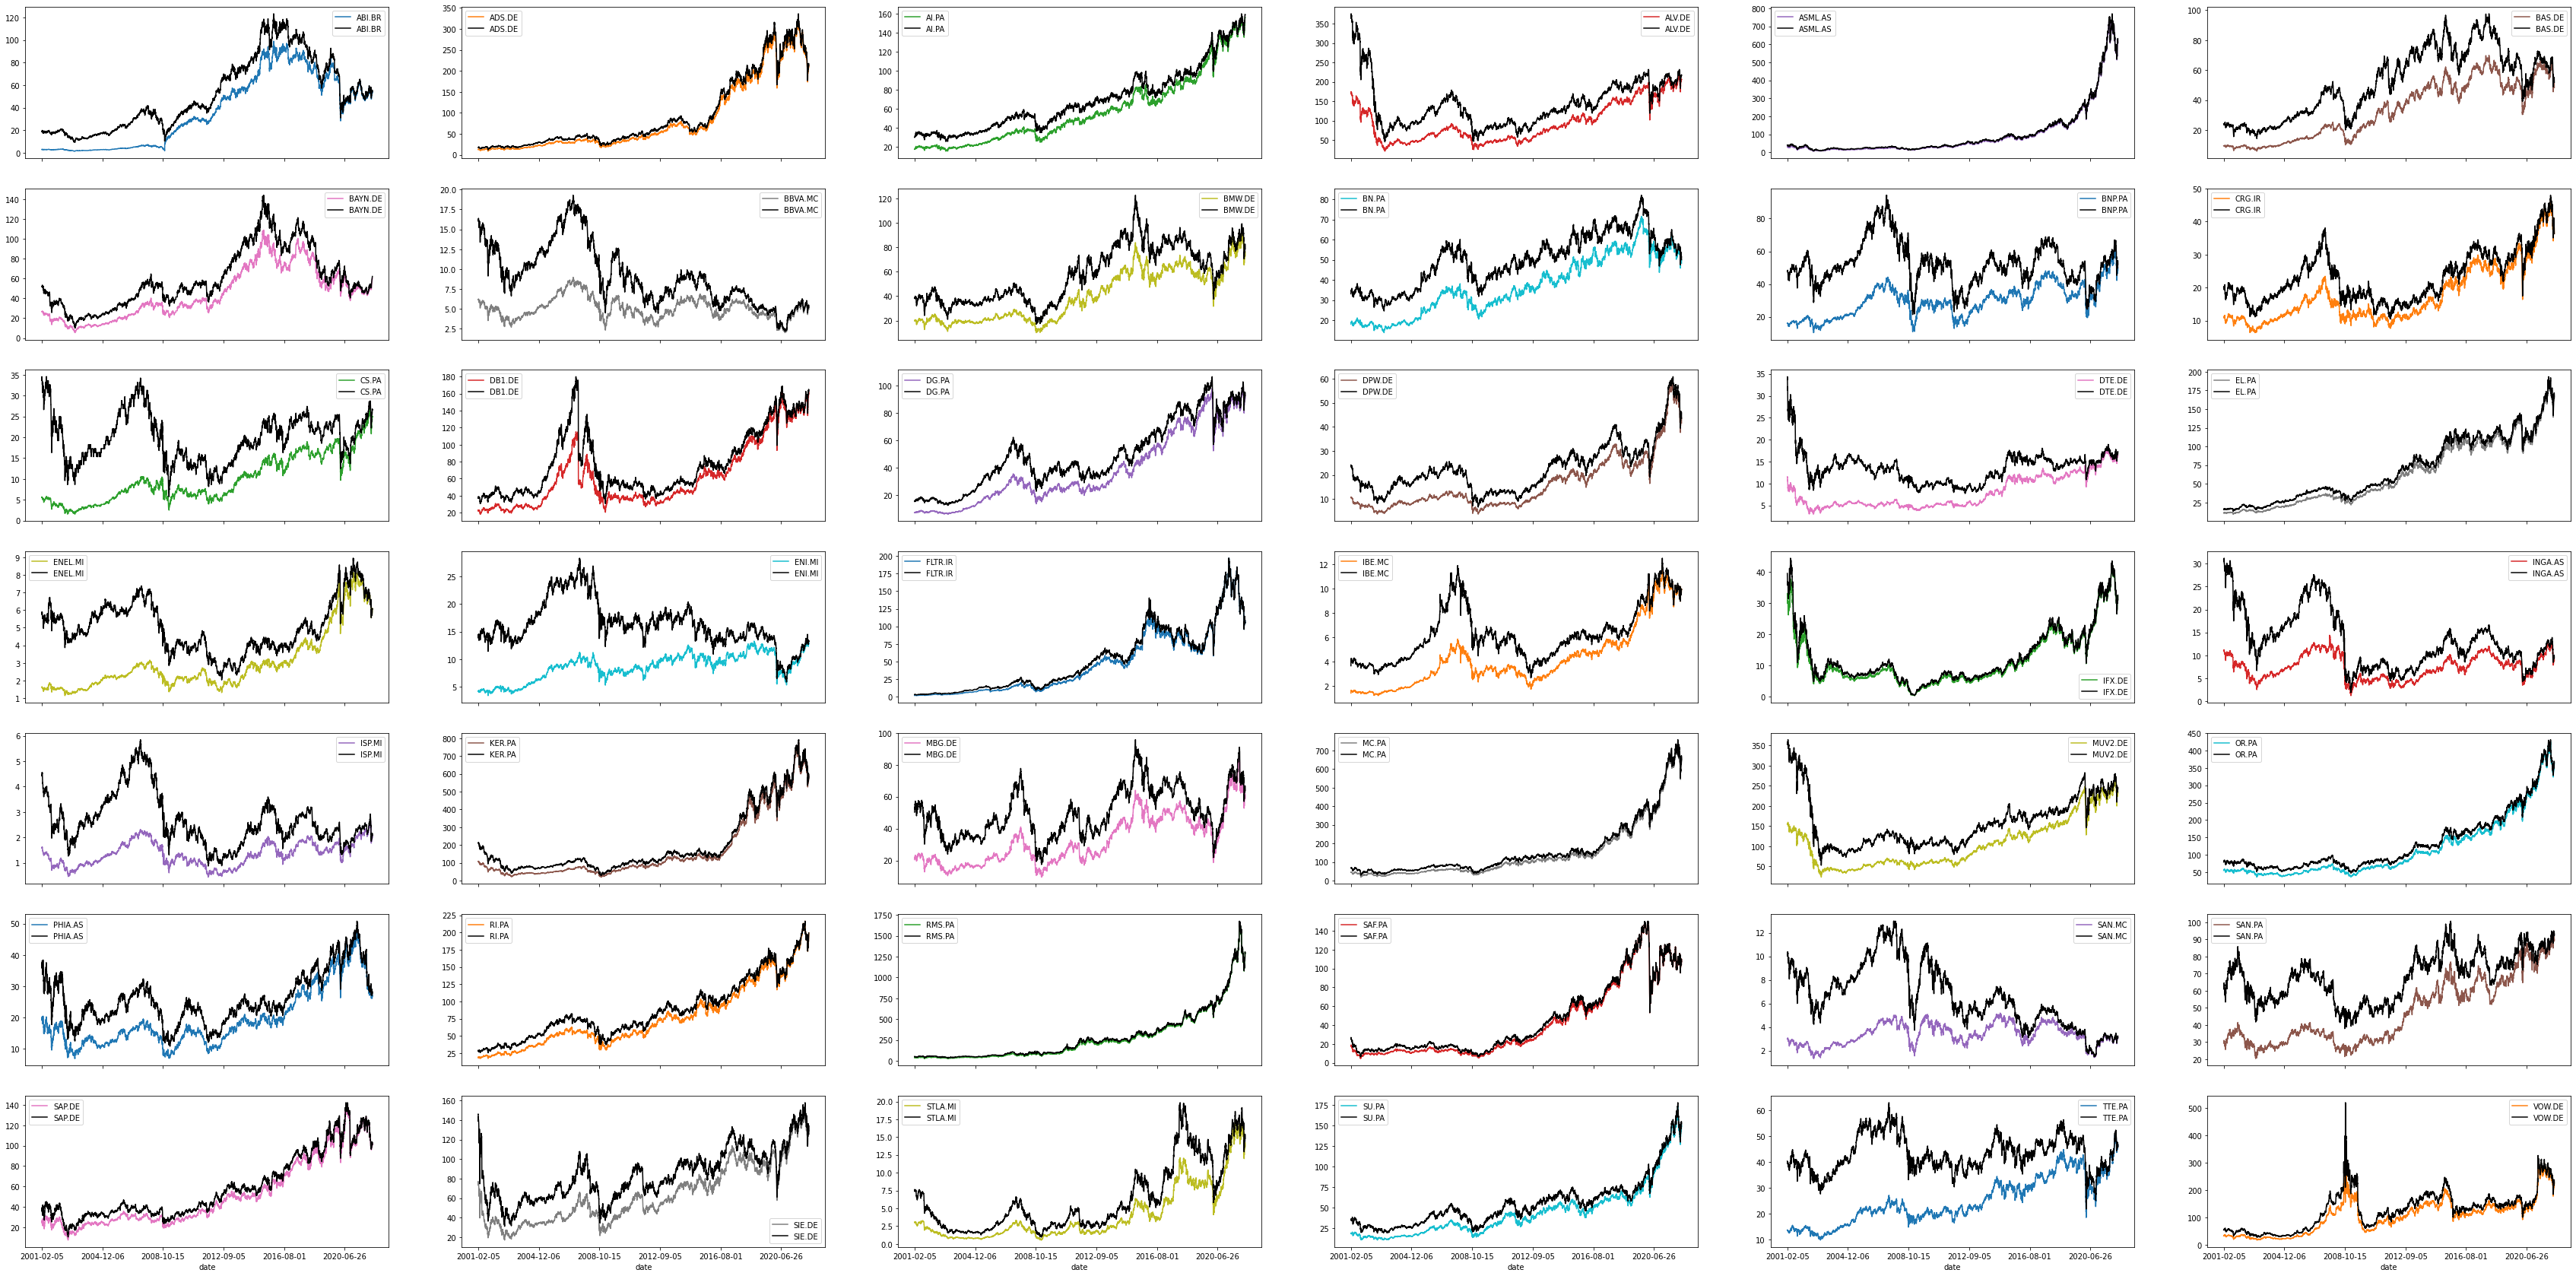

In [15]:
pClose = df_clean.pivot_table(index="date", columns="tic", values="close")
adjClose = df_clean.pivot_table(index="date", columns="tic", values="adjcp")
ax = adjClose.plot(subplots=True,layout=(7,6),figsize=(60,30))
pClose.plot(subplots=True,color = 'black',layout=(10,5),figsize=(60,30),ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e1400a5d0>,
      dtype=object)

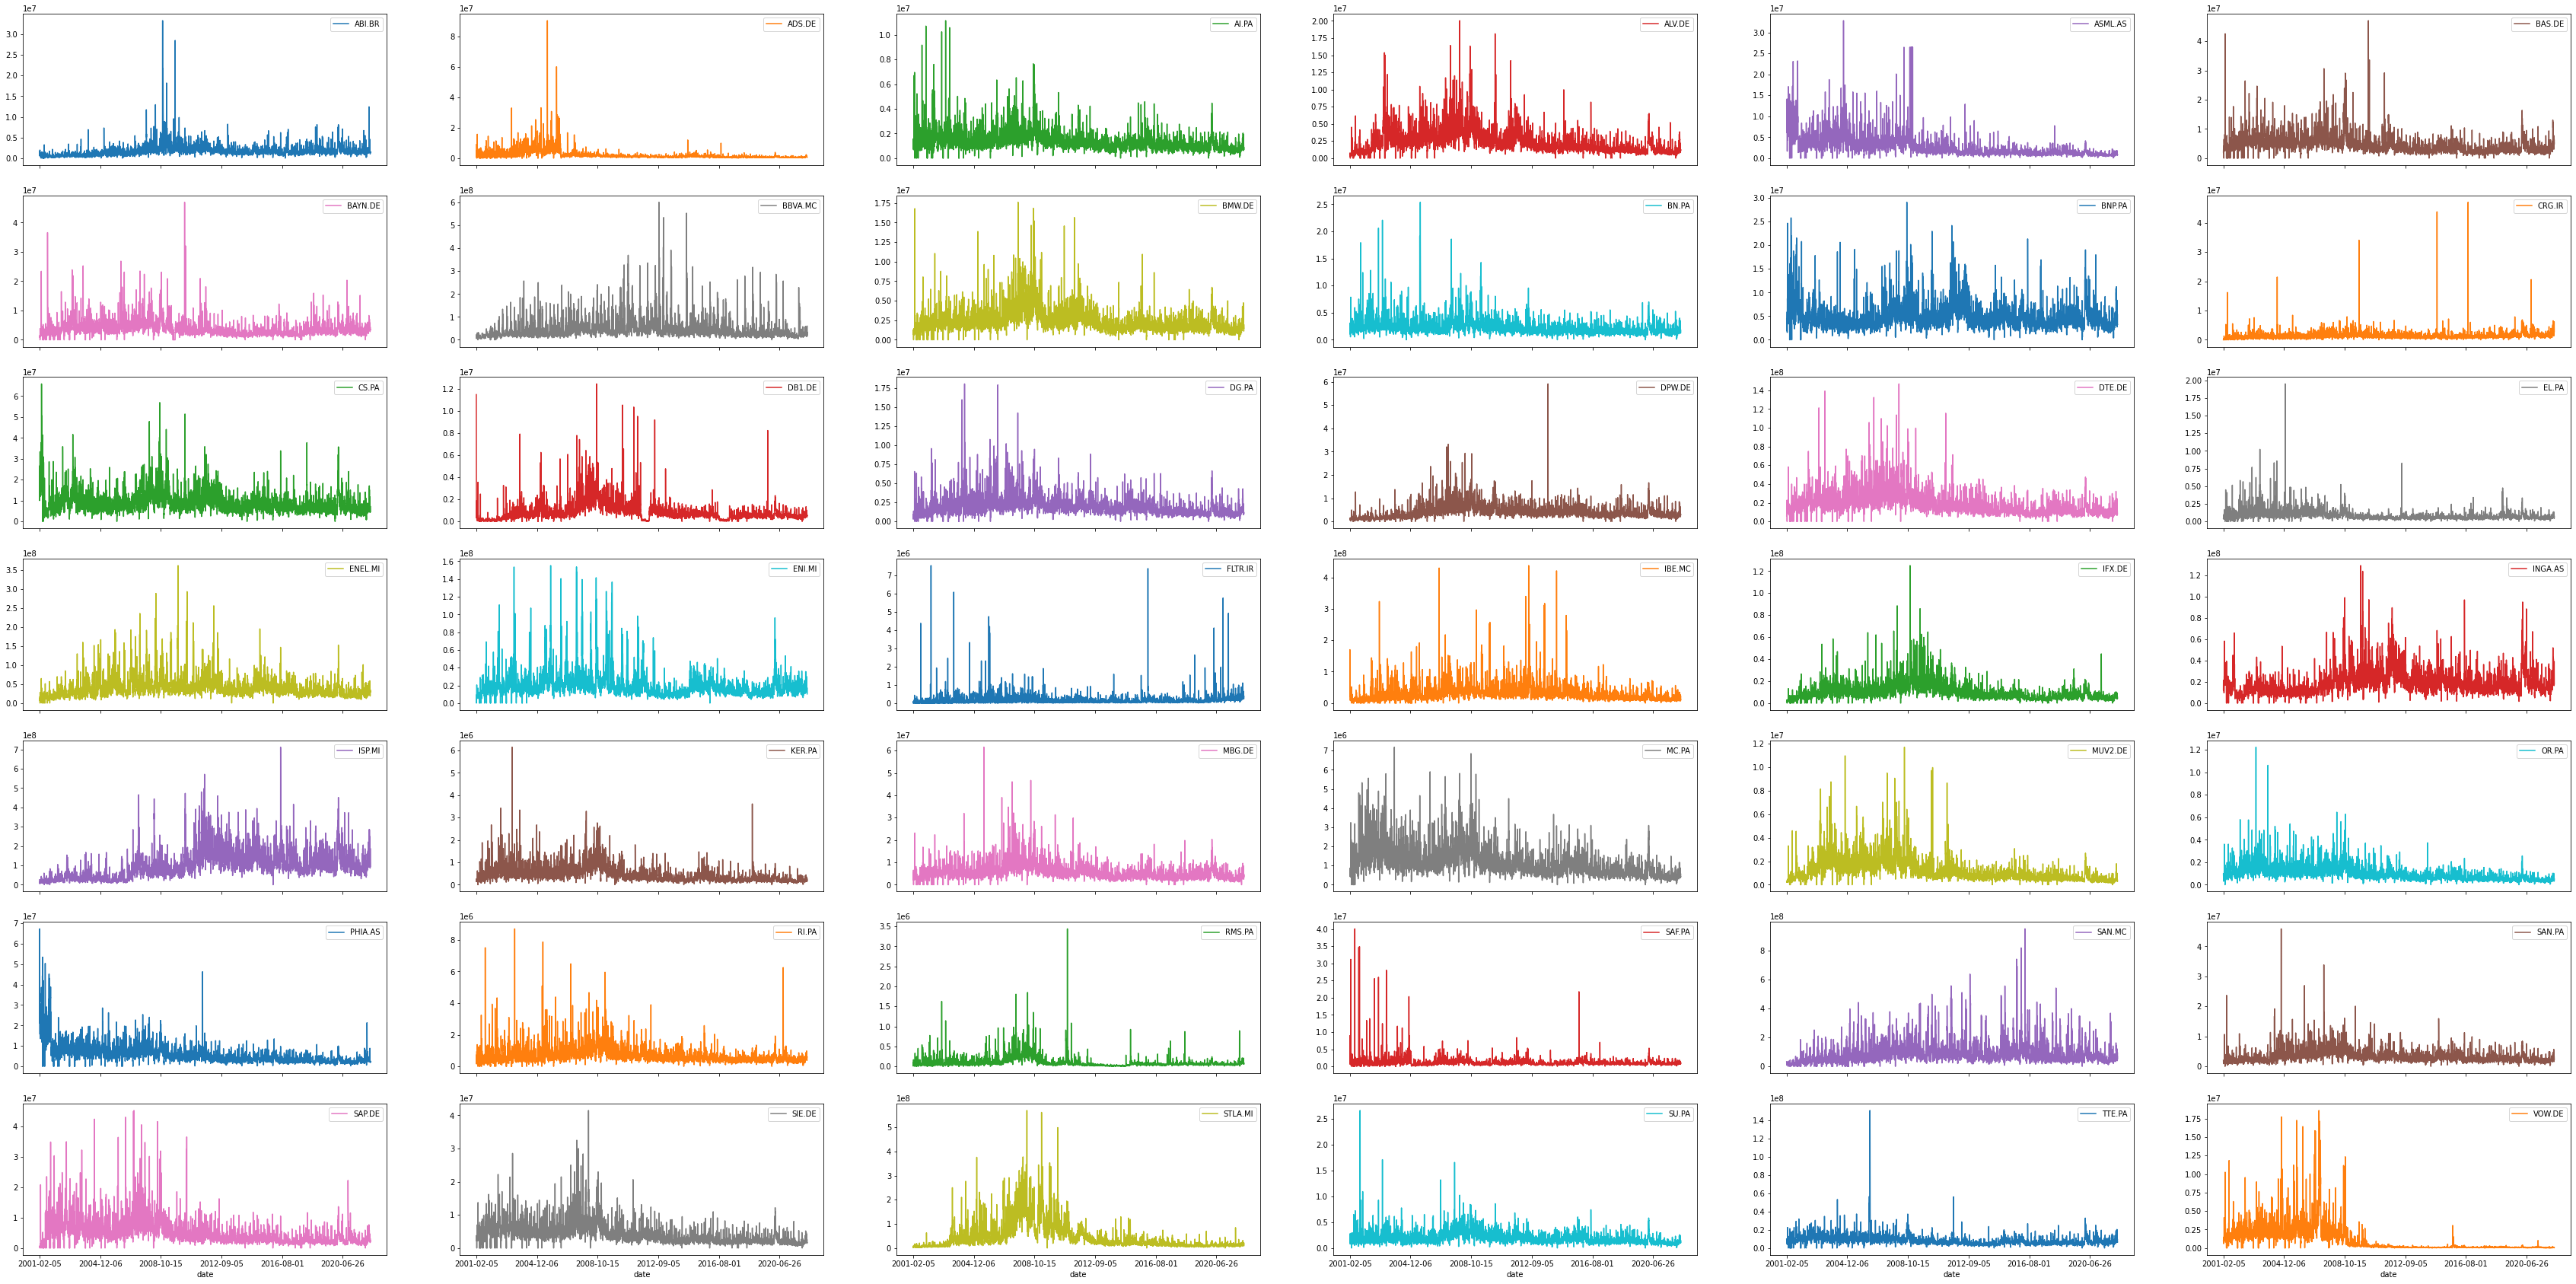

In [16]:
volume = df_clean.pivot_table(index="date", columns="tic", values="volume")
volume.plot(subplots=True,layout=(7,6),figsize=(60,30))